# PROGETTO: Web Scraping - Immobiliare.it

L'obiettivo di questo progetto è ottenere un'estrazione dei dati degli annunci presenti sul sito Immobiliare.it (https://www.immobiliare.it/), tramite la costruzione di una script che consenta di fare Web Scraping. Infine, dopo una fase di data cleaning e data exploration, costruire un modello di ML che consente di prevedere il prezzo di vendita/affitto degli immobili.

-----

Import Librerie

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup

## DATA SCRAPING

### Estrazione dati

Per l'estazione dei dati degli annunci dal sito web, ho creato uno script che contiene le seguenti funzioni: 
1) una prima funzione (scraping_zone_immobiliare) che ritorna una lista che comprende tutte le zone di una città;
2) una seconda funzione (scraping_immobiliare) che ritorna un dataframe in base alla città ed una singola zona;
3) una terza fuzione (city_dataframe) che, utilizzando in combinazione le precedenti, ritorna un unico dataframe con i dati di tutti gli annunci relativi ad una città.

Pertanto, dopo aver importato il suddetto script, sarà sufficente utilizzare direttamente la terza funzione (city_dataframe), la quale richiede come argomenti la città ed il tipo di annuncio (affitto/vendita).

In [2]:
#importo le funzioni contenute nello script

from function import scraping

In [3]:
#creo il df utilizzando la funzione importata

df_immobiliare_raw = scraping.city_dataframe('napoli', 'vendita')

In [4]:
df_immobiliare_raw

,title,città,zona,prezzo,superfice,piani,locali,bagni
0,Appartamento piazza San Maria degli Angeli Piz...,napoli,Chiaia,€ 1.400.000,284m²,1,5+,3+
1,"Appartamento Riviera Di Chiaia 264, Chiaia, Na...",napoli,Chiaia,€ 2.200.000,416m²,3,5+,3
2,"Appartamento via Santa Teresa a Chiaia, Chiaia...",napoli,Chiaia,€ 2.400.000,330m²,T,5+,3+
3,"Appartamento viale Nicola Fornelli 14, Chiaia,...",napoli,Chiaia,€ 1.100.000,230m²,R,5+,3
4,"Appartamento da ristrutturare, quinto piano, C...",napoli,Chiaia,€ 1.450.000,270m²,5,5+,3
...,...,...,...,...,...,...,...,...
4354,"Terratetto unifamiliare via marechiaro 26, Mar...",napoli,Marechiaro,€ 2.600.000,480m²,None,5+,3
4355,"Villa unifamiliare via Marechiaro, Marechiaro,...",napoli,Marechiaro,€ 1.700.000,357m²,None,5+,3+
4356,"Villa unifamiliare discesa Gaiola San c, Marec...",napoli,Marechiaro,€ 2.300.000,400m²,None,5+,3+
4357,"Appartamento in villa via Marechiaro, Marechia...",napoli,Marechiaro,€ 2.700.000,370m²,None,5+,3+


## DATA CLEANING & DATA EXPLORATION

### DATA CLEANING

In [5]:
df_immobiliare_clean = df_immobiliare_raw.copy()

In [6]:
df_immobiliare_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4359 entries, 0 to 4358
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      4359 non-null   object
 1   città      4359 non-null   object
 2   zona       4359 non-null   object
 3   prezzo     4243 non-null   object
 4   superfice  4356 non-null   object
 5   piani      4050 non-null   object
 6   locali     4296 non-null   object
 7   bagni      3914 non-null   object
dtypes: object(8)
memory usage: 272.6+ KB


In [7]:
#controllo i valori univoci nelle ultime tre colonne
for i in df_immobiliare_clean.columns[-3:]:
    print(i, " :", df_immobiliare_clean[i].unique())

piani  : ['1' '3' 'T' 'R' '5' None '2' '4' '6' 'S' '8' '7' '9' '5 - 6' '1 - 3'
 '2 - 3' '4 - 5' '3 - 4' '10' 'S2' '1 - 2' 'S4' '13' '11' '11+' 'S3' '14']
locali  : ['5+' '3' '4' '5' '2' '1' None]
bagni  : ['3+' '3' '2' '1' None]


In [8]:
#controllo i valori univoci nelle colonna prezzo
print("prezzo :", df_immobiliare_clean.prezzo.unique())

prezzo : ['€ 1.400.000' '€ 2.200.000' '€ 2.400.000' '€ 1.100.000' '€ 1.450.000'
 '€ 880.000' '€ 900.000' '€ 500.000' '€ 560.000' '€ 280.000' None
 '€ 380.000' '€ 135.000' '€ 785.000' '€ 700.000' '€ 2.600.000' '€ 685.000'
 '€ 275.000' '€ 995.000' '€ 1.881.295' '€ 350.000' '€ 320.000' '€ 470.000'
 '€ 170.000' '€ 435.000' '€ 355.000' '€ 450.000' '€ 1.080.000' '€ 550.000'
 '€ 190.000' 'da € 271.360,00' '€ 540.000' '€ 760.000' '€ 270.000'
 '€ 95.000' '€ 335.000' '€ 520.000' '€ 360.000' '€ 720.000' '€ 1.350.000'
 '€ 815.000' '€ 189.000' '€ 395.000' '€ 155.000' '€ 180.000' '€ 990.000'
 'da € 71.025,00' '€ 780.000' '€ 145.000' '€ 1.700.000' '€ 68.000'
 '€ 230.000' '€ 215.000' '€ 1.260.000' '€ 42.000' '€ 130.000' '€ 490.000'
 '€ 3.200.000' '€ 950.000' '€ 220.000' '€ 680.000' '€ 2.300.000'
 '€ 295.000' '€ 345.000' '€ 28.000' '€ 149.000' '€ 1.200.000' '€ 615.000'
 '€ 160.000' '€ 795.000' '€ 65.000' '€ 800.000' '€ 890.000' '€ 415.000'
 '€ 420.000' '€ 1.050.000' '€ 2.750.000' 'da € 696.000,00' '€ 2

In [9]:
#controllo le righe dove la colonna superfice ha valore None
df_immobiliare_clean[df_immobiliare_clean['superfice'].isnull()]

,title,città,zona,prezzo,superfice,piani,locali,bagni
1907,"Appartamento terzo piano, Ponticelli, Napoli",napoli,Ponticelli,€ 159.000,None,3,5+,None
2202,"Bilocale via umbria, Secondigliano, Napoli",napoli,Secondigliano,€ 135.000,None,2,2,None
2219,"Bilocale da ristrutturare, quinto piano, Secon...",napoli,Secondigliano,€ 116.000,None,None,2,1


Da quanto sopra emerge che bisogna: 

- Pulire i dati nelle colonne prezzo e superfice:
  - eliminare i simboli (€, m²), gli spazi, i punti;
  - mantenere solo il valore scontato ove presente;
  - sostituire i prezzi d'asta con il prezzo media della zona;

- Sostituire i None nella colonne prezzo e superfice (con la media della zona);

- Modificare il data type delle colonne prezzo e superficie;

- Pulire i dati nelle colonne superfice, bagni, locali:
  - eliminare le righe dove abbiamo valori None;
  - modificare il data type delle colonne'

In [10]:
#definisco una funzione per sostituire elementi all'interno dei valori di una colonna
def clean_function(col, find, replace): 
    return col.str.replace(find, replace, regex=False)

#### 1.Pulisco i valori nelle colonne prezzo e superficie

In [11]:
#Elimino '€', e 'm²' nei valori della colonna 'prezzo' e 'superficie
df_immobiliare_clean['prezzo'] = clean_function(df_immobiliare_clean['prezzo'],'€', '')
df_immobiliare_clean['superfice'] = clean_function(df_immobiliare_clean['superfice'],'m²', '')

#rinomino le colonne indicando l'unità di misura
df_immobiliare_clean = df_immobiliare_clean.rename(columns={'prezzo':'prezzo(€)','superfice':'superficie(m²)'})

In [12]:
#lista degli indici delle righe con il prezzo d'asta
index_prezzo_aste = df_immobiliare_clean[df_immobiliare_clean['prezzo(€)'].str.contains('da')==True].index

#sostituisco i prezzi d'asta con none, per poi dopo sostituirli con la media della zona
df_immobiliare_clean.loc[index_prezzo_aste, 'prezzo(€)'] = None

In [13]:
#lista degli indici delle righe con il prezzo scontato
index_prezzo_discount = df_immobiliare_clean[df_immobiliare_clean['prezzo(€)'].str.contains('%')==True].index

#sostituisco i prezzi scontati con il solo prezzo scontato
for i in list(range(0,len(index_prezzo_discount))):
    df_immobiliare_clean.loc[index_prezzo_discount[i], 'prezzo(€)'] = df_immobiliare_clean.loc[index_prezzo_discount[i], 'prezzo(€)'].split()[0]

In [14]:
#Elimino '.' nella colonna 'prezzo'
df_immobiliare_clean['prezzo(€)'] = clean_function(df_immobiliare_clean['prezzo(€)'],'.', '')

#Elimino '.' nella colonna 'superifice'
df_immobiliare_clean['superficie(m²)'] = clean_function(df_immobiliare_clean['superficie(m²)'],'.', '')


#### 2.Sostituisco i valori None con la media della zona per il prezzo e le superficie

In [15]:
#Converto in int i valori non null nella colonna prezzo
df_immobiliare_clean.loc[df_immobiliare_clean[df_immobiliare_clean['prezzo(€)'].notnull()]['prezzo(€)'].index, 'prezzo(€)'] = df_immobiliare_clean.loc[df_immobiliare_clean[df_immobiliare_clean['prezzo(€)'].notnull()]['prezzo(€)'].index, 'prezzo(€)'].astype('int')

#sostituisco i valori None nella colonna prezzo con la media di ogni zona
zone_unique = df_immobiliare_clean.zona.unique()

for c in zone_unique:
    m = df_immobiliare_clean[(df_immobiliare_clean['zona']==c) & (df_immobiliare_clean['prezzo(€)'].notnull())]['prezzo(€)'].mean()
    i = df_immobiliare_clean[(df_immobiliare_clean['zona']==c) & (df_immobiliare_clean['prezzo(€)'].isnull())]['prezzo(€)'].index
    df_immobiliare_clean.loc[i,'prezzo(€)'] = df_immobiliare_clean.loc[i,'prezzo(€)'].fillna(m)

#verifico che non ci siano null
df_immobiliare_clean[df_immobiliare_clean['prezzo(€)'].isnull()]


,title,città,zona,prezzo(€),superficie(m²),piani,locali,bagni


In [16]:
#Converto in int i valori non null nella colonna superfice
df_immobiliare_clean.loc[df_immobiliare_clean[df_immobiliare_clean['superficie(m²)'].notnull()]['superficie(m²)'].index, 'superficie(m²)'] = df_immobiliare_clean.loc[df_immobiliare_clean[df_immobiliare_clean['superficie(m²)'].notnull()]['superficie(m²)'].index, 'superficie(m²)'].astype('int')

#sostituisco i null nella colonna superfcie con la media di ogni zona
for c in zone_unique:
    m = df_immobiliare_clean[(df_immobiliare_clean['zona']==c) & (df_immobiliare_clean['superficie(m²)'].notnull())]['superficie(m²)'].mean()
    i = df_immobiliare_clean[(df_immobiliare_clean['zona']==c) & (df_immobiliare_clean['superficie(m²)'].isnull())]['superficie(m²)'].index
    df_immobiliare_clean.loc[i,'superficie(m²)'] = df_immobiliare_clean.loc[i,'superficie(m²)'].fillna(m)

#verifico che non ci siano null
df_immobiliare_clean[df_immobiliare_clean['superficie(m²)'].isnull()]

,title,città,zona,prezzo(€),superficie(m²),piani,locali,bagni


#### 3.Converto in 'int' i valori delle colonne prezzo e superficie

In [17]:
df_immobiliare_clean['superficie(m²)'] = df_immobiliare_clean['superficie(m²)'].astype('int')
df_immobiliare_clean['prezzo(€)'] = df_immobiliare_clean['prezzo(€)'].astype('int')

#### 4.Pulisco i valori nelle colonne bagni, locali, piani

In [18]:
#Elimino le righe dove vi è almeno un valore nullo nelle colonne bagni, locali, piani
df_immobiliare_clean = df_immobiliare_clean.dropna(subset=['piani', 'locali', 'bagni'])

In [19]:
df_immobiliare_clean['bagni'].unique()

array(['3+', '3', '2', '1'], dtype=object)

In [20]:
#Sostituisco '3+' con '4', infine converto in 'int'
df_immobiliare_clean['bagni'] = clean_function(df_immobiliare_clean['bagni'],'3+', '4')
df_immobiliare_clean['bagni'] = df_immobiliare_clean['bagni'].astype('int')

In [21]:
df_immobiliare_clean['locali'].unique()

array(['5+', '3', '4', '2', '1', '5'], dtype=object)

In [22]:
#Sostituisco '5+' con '6' e 'None' con zero, infine converto in 'int'
df_immobiliare_clean['locali'] = clean_function(df_immobiliare_clean['locali'],'5+', '6')
df_immobiliare_clean['locali'] = df_immobiliare_clean['locali'].astype('int')

In [23]:
df_immobiliare_clean['piani'].unique()

array(['1', '3', 'T', 'R', '5', '2', '4', '6', 'S', '8', '7', '9',
       '5 - 6', '1 - 3', '4 - 5', '3 - 4', '10', '2 - 3', 'S2', '1 - 2',
       'S4', '13', '11', '11+', 'S3', '14'], dtype=object)

In [24]:
#con il fine di avere i valori dei piani rappresentativi di una scala matematica che va dal più basso al più alto, sostiusco i valori come segue:

#Sostituisco 'T' con '0'
df_immobiliare_clean['piani'] = clean_function(df_immobiliare_clean['piani'],'T', '0')
#Sostituisco 'R' con '0.1'
df_immobiliare_clean['piani'] = clean_function(df_immobiliare_clean['piani'],'R', '0.1')
#Sostituisco 'S2' con '-2'
df_immobiliare_clean['piani'] = clean_function(df_immobiliare_clean['piani'],'S2', '-2')
#Sostituisco 'S3' con '-3'
df_immobiliare_clean['piani'] = clean_function(df_immobiliare_clean['piani'],'S3', '-3')
#Sostituisco 'S4' con '-4'
df_immobiliare_clean['piani'] = clean_function(df_immobiliare_clean['piani'],'S4', '-4')
#Sostituisco 'S' con '-1'
df_immobiliare_clean['piani'] = clean_function(df_immobiliare_clean['piani'],'S', '-1')      #da inserire dopo gli altri S
#Sostituisco '1 - 2' con '1.5'
df_immobiliare_clean['piani'] = clean_function(df_immobiliare_clean['piani'],'1 - 2', '1.5')
#Sostituisco '1 - 3' con '2'
df_immobiliare_clean['piani'] = clean_function(df_immobiliare_clean['piani'],'1 - 3', '2')
#Sostituisco '2 - 3' con '2.5'
df_immobiliare_clean['piani'] = clean_function(df_immobiliare_clean['piani'],'2 - 3', '2.5')
#Sostituisco '3 - 4' con '3.5'
df_immobiliare_clean['piani'] = clean_function(df_immobiliare_clean['piani'],'3 - 4', '3.5')
#Sostituisco '4 - 5' con '4.5'
df_immobiliare_clean['piani'] = clean_function(df_immobiliare_clean['piani'],'4 - 5', '4.5')
#Sostituisco '5 - 6' con '5.5'
df_immobiliare_clean['piani'] = clean_function(df_immobiliare_clean['piani'],'5 - 6', '5.5')
#Sostituisco '11+' con '12'
df_immobiliare_clean['piani'] = clean_function(df_immobiliare_clean['piani'],'11+', '12')
#Infine converto in 'float'
df_immobiliare_clean['piani'] = df_immobiliare_clean['piani'].astype('float')

In [25]:
df_immobiliare = df_immobiliare_clean.copy()

### DATA EXPLORATION

#### Info generali

In [27]:
df_immobiliare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3655 entries, 0 to 4358
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3655 non-null   object 
 1   città           3655 non-null   object 
 2   zona            3655 non-null   object 
 3   prezzo(€)       3655 non-null   int32  
 4   superficie(m²)  3655 non-null   int32  
 5   piani           3655 non-null   float64
 6   locali          3655 non-null   int32  
 7   bagni           3655 non-null   int32  
dtypes: float64(1), int32(4), object(3)
memory usage: 199.9+ KB


In [29]:
df_immobiliare.describe()

,prezzo(€),superficie(m²),piani,locali,bagni
count,3.655000e+03,3655.000000,3655.000000,3655.000000,3655.000000
mean,3.383356e+05,146.913817,2.323776,3.499316,1.523119
std,3.504279e+05,1991.892687,2.121423,1.344142,0.687641
min,1.200000e+03,1.000000,-4.000000,1.000000,1.000000
25%,1.450000e+05,70.000000,1.000000,3.000000,1.000000
50%,2.350000e+05,100.000000,2.000000,3.000000,1.000000
75%,4.150000e+05,130.000000,4.000000,4.000000,2.000000
max,8.500000e+06,120000.000000,14.000000,6.000000,4.000000


Notiamo che il minimo ed il massimo della varibile superfice sembrano essere anomali

#### Variabile prezzo

In [30]:
#numero di annunci per zona
df_immobiliare.groupby('zona')['prezzo(€)'].describe().sort_values(by="std", ascending=False)

,count,mean,std,min,25%,50%,75%,max
zona,,,,,,,,
Chiaia,129.0,798839.837209,969120.309695,1200.0,280000.0,500000.0,900000.0,8500000.0
Marechiaro,26.0,899961.538462,562647.348222,165000.0,390000.0,837500.0,1237250.0,1900000.0
Posillipo,190.0,686543.357895,470358.323829,85000.0,289250.0,647500.0,890000.0,2500000.0
Vomero,206.0,563826.635922,382199.256389,70000.0,350000.0,495000.0,677500.0,3000000.0
Mergellina,352.0,631931.818182,329988.562193,115000.0,450000.0,550000.0,830000.0,1350000.0
Museo,50.0,332533.840000,310361.008957,33000.0,100000.0,240000.0,502500.0,1620000.0
Centro,220.0,279761.754545,235174.209660,40000.0,133750.0,215000.0,340000.0,1600000.0
Materdei,756.0,240761.904762,187741.068492,25000.0,82000.0,220000.0,295000.0,890000.0
Arenella,220.0,413982.495455,180564.814276,59000.0,295000.0,387500.0,490000.0,1150000.0


Notiamo che nelle zone dove gli immobili hanno un valore più alto, vi è una forte deviazione standard. La mediana sembra essere più rappresentativa del valore del prezzo.

#### Variabile superfice

In [31]:
#numero di annunci per zona
df_immobiliare.groupby('zona')['superficie(m²)'].describe().sort_values(by="min", ascending=False)

,count,mean,std,min,25%,50%,75%,max
zona,,,,,,,,
Scampia,43.0,117.813953,38.186420,57.0,94.00,115.0,130.00,240.0
Mergellina,352.0,128.090909,48.264144,50.0,85.00,122.5,175.00,197.0
Marechiaro,26.0,167.615385,129.911378,45.0,81.00,135.0,205.50,675.0
Piscinola,75.0,96.146667,37.663766,40.0,70.00,90.0,115.00,250.0
Barra,82.0,92.268293,58.185113,35.0,65.00,80.0,97.75,450.0
Camaldoli,28.0,390.428571,1589.753124,35.0,68.75,87.5,110.00,8500.0
Posillipo,190.0,135.057895,64.370060,30.0,87.75,122.5,164.75,371.0
Poggioreale,45.0,84.177778,30.873855,30.0,65.00,72.0,105.00,190.0
Arenella,220.0,108.440909,37.530519,30.0,80.00,105.0,133.50,220.0


In [32]:
#verifichiamo la zona Capodichino che sembra avere un minimo ed un massimo anomali

df_immobiliare[df_immobiliare['zona']=='Capodichino'].sort_values(by="superficie(m²)", ascending=False)

,title,città,zona,prezzo(€),superficie(m²),piani,locali,bagni
2385,"Trilocale Strada Comunale dei Cavoni 6, Capodi...",napoli,Capodichino,190000,120000,0.1,3,1
2260,"Attico via dello Sputnik, Capodichino, Napoli",napoli,Capodichino,330000,385,3.5,4,1
2356,"Palazzo - Edificio via della Mongolfiera, Capo...",napoli,Capodichino,190062,260,1.0,6,2
2263,"Quadrilocale via Filippo Maria Briganti 324, C...",napoli,Capodichino,164000,215,0.0,4,2
2354,Palazzo - Edificio via Filippo Maria Briganti ...,napoli,Capodichino,350000,200,0.0,1,1
...,...,...,...,...,...,...,...,...
2319,"Bilocale via Francesco De Pinedo 15, Secondigl...",napoli,Capodichino,41900,32,0.0,2,1
2308,"Monolocale via Francesco Aggello, Capodichino,...",napoli,Capodichino,37500,30,0.0,1,1
2291,"Monolocale Sanda Provinciale di Caserta 177, S...",napoli,Capodichino,35000,30,0.0,1,1
2317,"Monolocale Strada Provinciale di Caserta, Capo...",napoli,Capodichino,25000,25,0.0,1,1


In [33]:
#verifichiamo la zona Camaldoli che sembra avere un massimo anomalo

df_immobiliare[df_immobiliare['zona']=='Camaldoli'].sort_values(by="superficie(m²)", ascending=False).head()

,title,città,zona,prezzo(€),superficie(m²),piani,locali,bagni
952,"Palazzo - Edificio via dell'Eremo 81, Camaldol...",napoli,Camaldoli,315910,8500,1.0,6,4
931,"Quadrilocale via Vicinale Agnolella 2, Camaldo...",napoli,Camaldoli,560000,190,1.0,4,3
942,"Appartamento via Camaldolilli, Camaldoli, Napoli",napoli,Camaldoli,570000,190,1.0,5,3
954,"Quadrilocale via Camillo Guerra, Camaldoli, Na...",napoli,Camaldoli,175000,136,2.5,4,1
937,"Trilocale viale Sant'Ignazio di Loyola, Camald...",napoli,Camaldoli,230000,120,0.1,3,1


Notiamo che nelle zona di Capodino vi è una forte varianza, infatti il minimo ed il massimo sembrano essere dei valori anomali.
Inoltre, sembrano esserci dei valori anomali osservando i minimi (inferiori a 3 metri quadri) nelle zone di Capodichino, Fuorigrotta e Ponticelli.
Per la zona Camaldoli notiamo un immobile che sembra anomalo (un prezzo insolitamente basso considerando il valore la superfice di 8500m²).


Anche in questo caso la mediana sembra essere più rappresentativa del valore del superfice.

#### Verifica e rimozione valori anomali

Osserviamo la distribuzione delle variabili prezzo e superfice tramite boxpolt in base alle zone per individuare i valori anomali

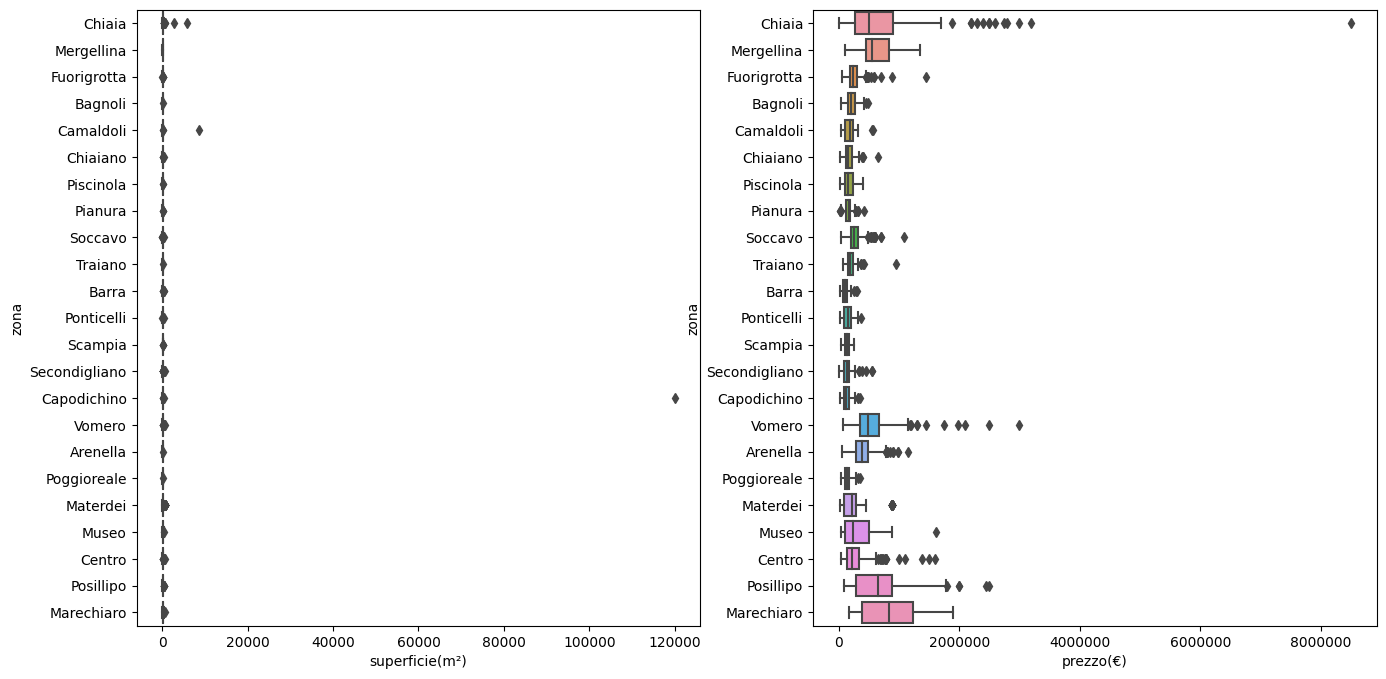

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
sns.boxplot(y='zona', x='superficie(m²)', data=df_immobiliare, ax=axs[0])
sns.boxplot(y='zona', x='prezzo(€)', data=df_immobiliare, ax=axs[1])
axs[1].ticklabel_format(style='plain', axis='x')
plt.show()

Eliminiamo i valori anomali così inviduati: superfice superiore a 400 metri quadri e prezzo superiore ai 2.000.000 euro.

In [42]:
df_immobiliare = df_immobiliare[df_immobiliare['prezzo(€)']<2000000]
df_immobiliare = df_immobiliare[df_immobiliare['superficie(m²)']<400]
df_immobiliare = df_immobiliare.reset_index(drop=True)

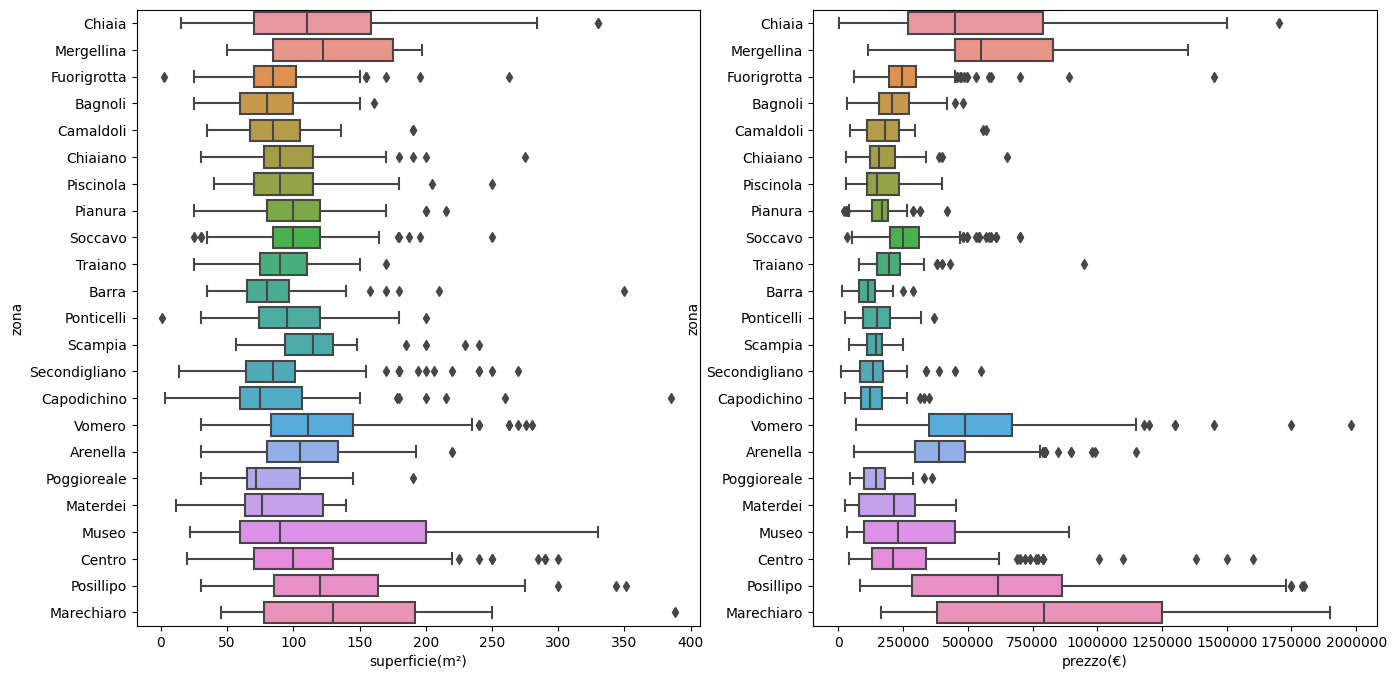

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
sns.boxplot(y='zona', x='superficie(m²)', data=df_immobiliare, ax=axs[0])
sns.boxplot(y='zona', x='prezzo(€)', data=df_immobiliare, ax=axs[1])
axs[1].ticklabel_format(style='plain', axis='x')
plt.show()

In [44]:
df_immobiliare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3581 entries, 0 to 3580
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3581 non-null   object 
 1   città           3581 non-null   object 
 2   zona            3581 non-null   object 
 3   prezzo(€)       3581 non-null   int32  
 4   superficie(m²)  3581 non-null   int32  
 5   piani           3581 non-null   float64
 6   locali          3581 non-null   int32  
 7   bagni           3581 non-null   int32  
dtypes: float64(1), int32(4), object(3)
memory usage: 168.0+ KB


#### Migliori zone per rapporto €/m²

Classifica per prezzo

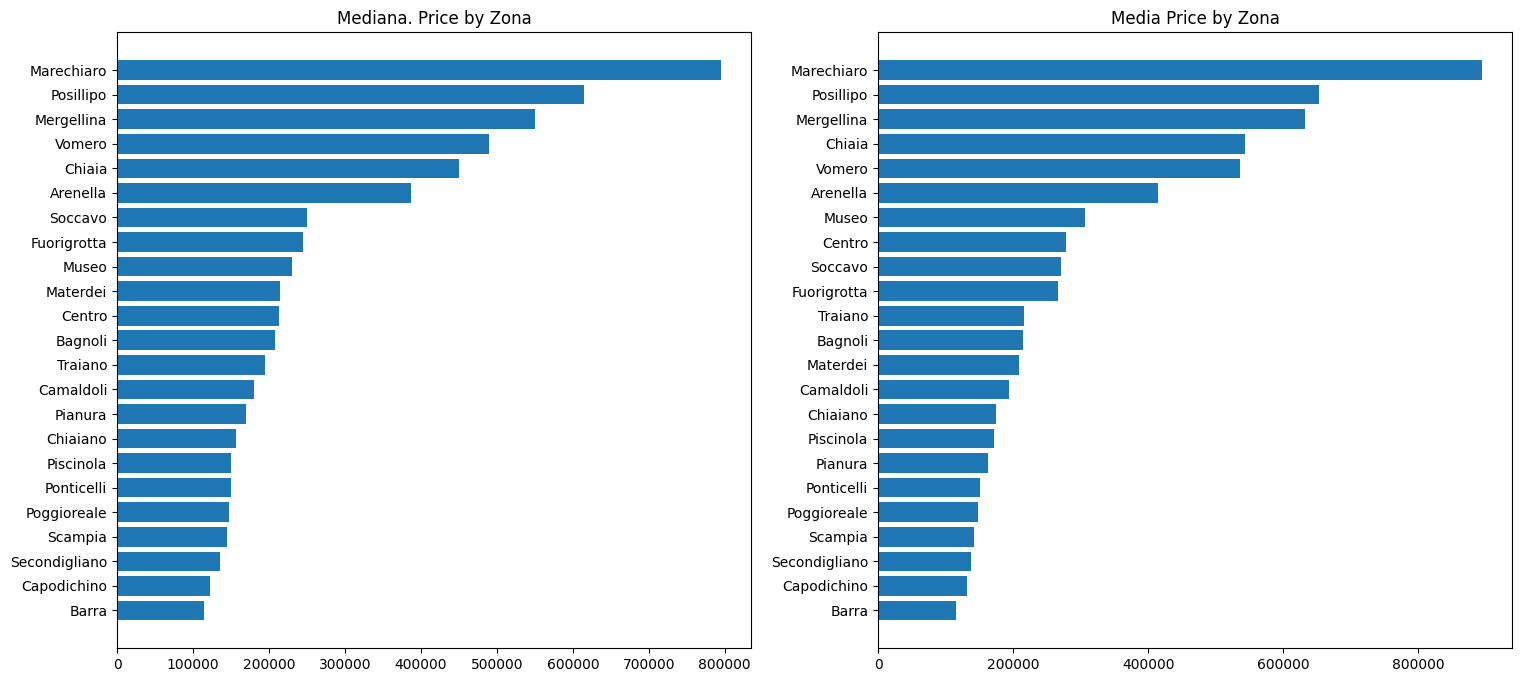

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
axs[0].barh('zona', 'prezzo(€)', data=df_immobiliare.groupby('zona', as_index=False)['prezzo(€)'].median().sort_values(by='prezzo(€)', ascending=True))
axs[0].set_title('Mediana. Price by Zona')
axs[1].barh('zona', 'prezzo(€)', data=df_immobiliare.groupby('zona', as_index=False)['prezzo(€)'].mean().sort_values(by='prezzo(€)', ascending=True))
axs[1].set_title('Media Price by Zona')
plt.show()

Classifica per superfice

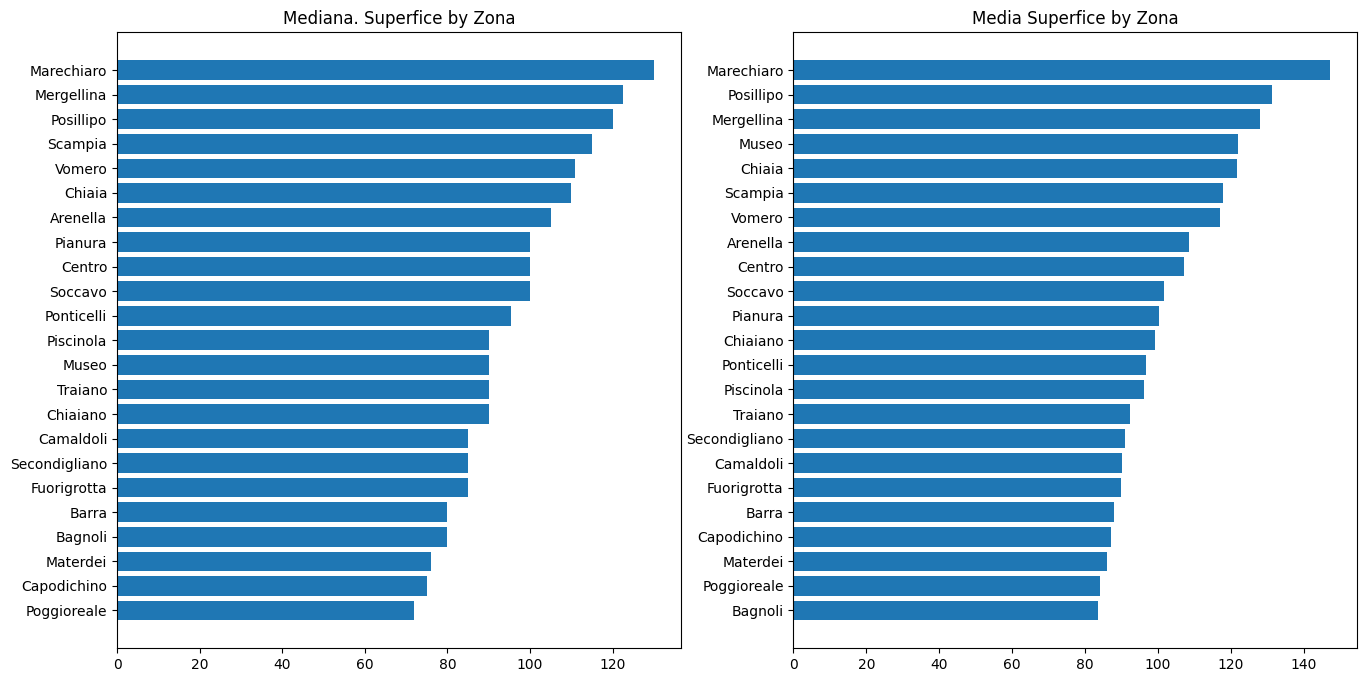

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].barh('zona', 'superficie(m²)', data=df_immobiliare.groupby('zona', as_index=False)['superficie(m²)'].median().sort_values(by='superficie(m²)', ascending=True))
axs[0].set_title('Mediana. Superfice by Zona')
axs[1].barh('zona', 'superficie(m²)', data=df_immobiliare.groupby('zona', as_index=False)['superficie(m²)'].mean().sort_values(by='superficie(m²)', ascending=True))
axs[1].set_title('Media Superfice by Zona')
plt.show()

Classifica per rapporto superfice / prezzo

In [48]:
df_immobiliare['rapporto m²/€'] = df_immobiliare['superficie(m²)']/df_immobiliare['prezzo(€)']

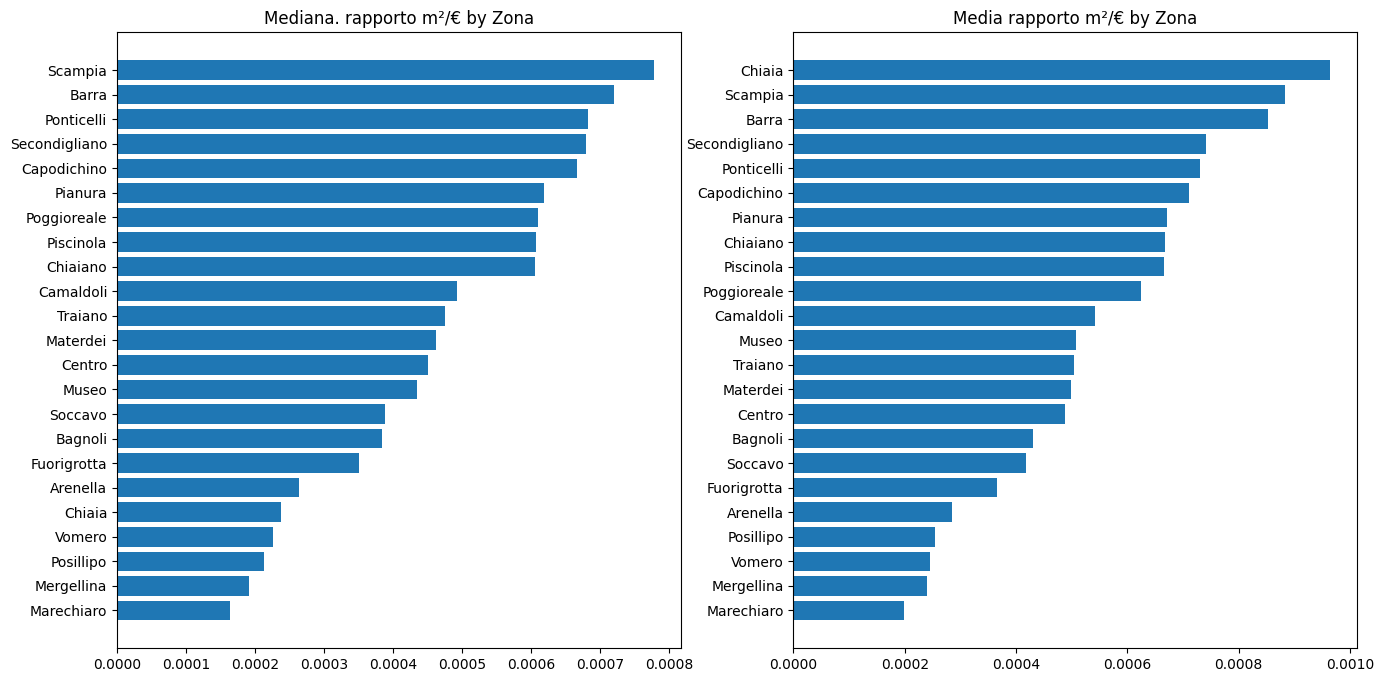

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].barh('zona', 'rapporto m²/€', data=df_immobiliare.groupby('zona', as_index=False)['rapporto m²/€'].median().sort_values(by='rapporto m²/€', ascending=True))
axs[0].set_title('Mediana. rapporto m²/€ by Zona')
axs[1].barh('zona', 'rapporto m²/€', data=df_immobiliare.groupby('zona', as_index=False)['rapporto m²/€'].mean().sort_values(by='rapporto m²/€', ascending=True))
axs[1].set_title('Media rapporto m²/€ by Zona')
plt.show()

## MODELLO DI REGRESSIONE LINEARE

### ANALISI CORRELLEZIONE

Si può notare una forte correlazione del prezzo con la superficie. Quest'ultima è molto correllata a sua volta con il numero di locali e di bagni, come ci si può aspettare.
Mentre il piano non sembra influire tanto sul prezzo quanto invece la superfice. 

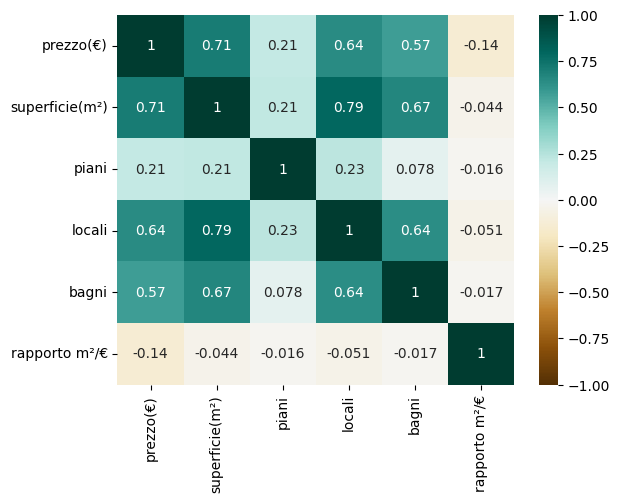

In [50]:
sns.heatmap(df_immobiliare[df_immobiliare.columns[3:]].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

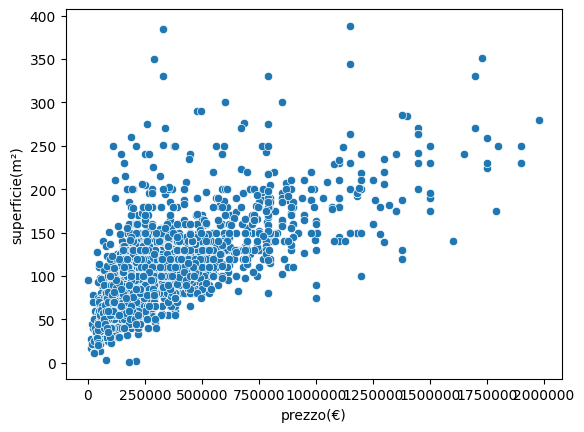

In [51]:
sns.scatterplot(data=df_immobiliare, x='prezzo(€)', y='superficie(m²)')
plt.ticklabel_format(style='plain', axis='x')

### REGRESSIONE SEMPLICE

Prevediamo il prezzo di un appartamento in base al valore della superfice

In [52]:
import statsmodels.api as sm

#definiamo il modello
Y = df_immobiliare['prezzo(€)']
X = df_immobiliare['superficie(m²)']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

In [54]:
list_prezzi = []
list_metriq = [ 50, 60 , 70 , 80, 90, 100, 110, 120]
for c in list_metriq:
    list_prezzi.append(str(round(results.predict(np.array([1, c]))[0],2)))

df_prev_prezzi = pd.DataFrame({'metriq': list_metriq, 'prezzo_prev': list_prezzi})

df_prev_prezzi

,metriq,prezzo_prev
0,50,98131.77
1,60,140151.32
2,70,182170.87
3,80,224190.41
4,90,266209.96
5,100,308229.5
6,110,350249.05
7,120,392268.6
